In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# We have 3 sheets
## All we need is merging the useful sheet

In [12]:
excel_file = pd.ExcelFile('DataBase.xlsx')

In [13]:
accounts = excel_file.parse('Chart Of Accounts')
payments = excel_file.parse('Payments')
income = excel_file.parse('Income')

In [14]:
accounts.rename(columns= lambda x : x.replace(" ", "_",), inplace=True)
accounts

,Account_ID,Category,Sub_Category,Groups,Cash_Flow_Type,Type
0,3,CASH OUT FLOW,TRANSACTIONS,INVESTMENTS (INVEST),NON-OPERATIONAL,REVENUE
1,4,CASH IN FLOW,TRANSACTIONS,INVESTMENTS (REDEEM),NON-OPERATIONAL,REVENUE
2,6,CASH OUT FLOW,TRANSACTIONS,MUTUAL - EXPENSE,NON-OPERATIONAL,REVENUE
3,5,CASH IN FLOW,TRANSACTIONS,MUTUAL - REVENUE,NON-OPERATIONAL,REVENUE
4,2,CASH OUT FLOW,TRANSACTIONS,TRANSFERS AMONG EXPENSE ACCOUNTS,NON-OPERATIONAL,REVENUE
...,...,...,...,...,...,...
132,7006,CASH OUT FLOW,TAXS / FEES,FEDERAL TAXES - INSTALLED / DELAYED,OPERATIONAL,VARIABLE
133,7010,CASH OUT FLOW,TAXS / FEES,FEDERAL TAXES - SOCIAL INTEGRATION PROGRAM,OPERATIONAL,VARIABLE
134,7011,CASH OUT FLOW,TAXS / FEES,MUNICIPAL TAXES - SERVICE TAX,OPERATIONAL,VARIABLE
135,7012,CASH OUT FLOW,TAXS / FEES,MUNICIPAL TAXES - MINI/SMALL BUSINESS TAX,OPERATIONAL,VARIABLE


In [15]:
payments.rename(columns={'Chart Account ID':'Account_ID'}, inplace=True)

In [16]:
df1 = accounts.merge(payments, how='right')
df1.head()

,Account_ID,Category,Sub_Category,Groups,Cash_Flow_Type,Type,Issue Date,Due Date,Settlement Date,Provider,UF,Amount Paid
0,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-08-25,2017-08-25,Provider 1,SP,810.52
1,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-08-11,2017-08-11,Provider 1,SP,969.39
2,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-07-28,2017-07-28,Provider 1,SP,950.57
3,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-07-21,2017-07-21,Provider 1,SP,2348.31
4,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-07-14,2017-07-14,Provider 1,SP,836.49


In [17]:
income.rename(columns={'Chart Account ID' : 'Account_ID'}, inplace=True)

In [18]:
df2 = accounts.merge(income, how='right')
df2.head()

,Account_ID,Category,Sub_Category,Groups,Cash_Flow_Type,Type,Issue Date,Due Date,Settlement Date,UF,Customer,Amount Received
0,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-01-02,2017-01-30,2017-01-31,RJ,Customer 1,787.13
1,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-01-02,2017-02-01,2017-02-02,RJ,Customer 1,655.13
2,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-01-02,2017-02-06,2017-02-07,RJ,Customer 1,354.72
3,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-01-03,2017-01-03,2017-01-04,SP,Customer 2,2597.01
4,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-01-03,2017-02-07,2017-02-08,SP,Customer 3,785.65


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20052 entries, 0 to 20051
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Account_ID       20052 non-null  int64         
 1   Category         20052 non-null  object        
 2   Sub_Category     20052 non-null  object        
 3   Groups           20052 non-null  object        
 4   Cash_Flow_Type   20052 non-null  object        
 5   Type             20052 non-null  object        
 6   Issue Date       20052 non-null  datetime64[ns]
 7   Due Date         20052 non-null  datetime64[ns]
 8   Settlement Date  20052 non-null  datetime64[ns]
 9   Provider         20052 non-null  object        
 10  UF               20052 non-null  object        
 11  Amount Paid      20052 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(7)
memory usage: 2.0+ MB


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14671 entries, 0 to 14670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Account_ID       14671 non-null  int64         
 1   Category         14671 non-null  object        
 2   Sub_Category     14671 non-null  object        
 3   Groups           14671 non-null  object        
 4   Cash_Flow_Type   14671 non-null  object        
 5   Type             14671 non-null  object        
 6   Issue Date       14671 non-null  datetime64[ns]
 7   Due Date         14671 non-null  datetime64[ns]
 8   Settlement Date  14671 non-null  datetime64[ns]
 9   UF               14671 non-null  object        
 10  Customer         14671 non-null  object        
 11  Amount Received  14671 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(7)
memory usage: 1.5+ MB


In [21]:
df1.describe()['Amount Paid']

count     20052.000000
mean       3566.200249
std       11815.116802
min           0.010000
25%         227.232500
50%         976.720000
75%        2878.625000
max      638443.670000
Name: Amount Paid, dtype: float64

In [22]:
df2.describe()['Amount Received']

count     14671.000000
mean       4146.476006
std       23639.438854
min           0.000000
25%         514.805000
50%         949.270000
75%        1899.735000
max      895806.780000
Name: Amount Received, dtype: float64

In [25]:
df1['Due_Date_month'] = df1['Due Date'].dt.month_name()
df1['Due_Date_Day'] = df1['Due Date'].dt.day_name()

In [26]:
df1.head()

,Account_ID,Category,Sub_Category,Groups,Cash_Flow_Type,Type,Issue Date,Due Date,Settlement Date,Provider,UF,Amount Paid,Due_Date_month,Due_Date_Day
0,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-08-25,2017-08-25,Provider 1,SP,810.52,August,Friday
1,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-08-11,2017-08-11,Provider 1,SP,969.39,August,Friday
2,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-07-28,2017-07-28,Provider 1,SP,950.57,July,Friday
3,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-07-21,2017-07-21,Provider 1,SP,2348.31,July,Friday
4,6105,CASH OUT FLOW,DIRECT EXPENSES,FINISHING MATERIALS,OPERATIONAL,VARIABLE,2017-06-16,2017-07-14,2017-07-14,Provider 1,SP,836.49,July,Friday


In [27]:
df2['Due_Date_month'] = df2['Due Date'].dt.month_name()
df2.head()

,Account_ID,Category,Sub_Category,Groups,Cash_Flow_Type,Type,Issue Date,Due Date,Settlement Date,UF,Customer,Amount Received,Due_Date_month
0,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-01-02,2017-01-30,2017-01-31,RJ,Customer 1,787.13,January
1,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-01-02,2017-02-01,2017-02-02,RJ,Customer 1,655.13,February
2,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-01-02,2017-02-06,2017-02-07,RJ,Customer 1,354.72,February
3,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-01-03,2017-01-03,2017-01-04,SP,Customer 2,2597.01,January
4,5003,CASH IN FLOW,OPERATIONAL REVENUE,SALES OF MERCHANDISE,OPERATIONAL,REVENUE,2017-01-03,2017-02-07,2017-02-08,SP,Customer 3,785.65,February


In [28]:
df1.shape

(20052, 14)

In [29]:
df2.shape

(14671, 13)

In [30]:
df1.columns.to_list()

['Account_ID',
 'Category',
 'Sub_Category',
 'Groups',
 'Cash_Flow_Type',
 'Type',
 'Issue Date',
 'Due Date',
 'Settlement Date',
 'Provider',
 'UF',
 'Amount Paid',
 'Due_Date_month',
 'Due_Date_Day']

In [31]:
df2.columns.to_list()

['Account_ID',
 'Category',
 'Sub_Category',
 'Groups',
 'Cash_Flow_Type',
 'Type',
 'Issue Date',
 'Due Date',
 'Settlement Date',
 'UF',
 'Customer',
 'Amount Received',
 'Due_Date_month']

In [32]:
df1.dtypes

Account_ID                  int64
Category                   object
Sub_Category               object
Groups                     object
Cash_Flow_Type             object
Type                       object
Issue Date         datetime64[ns]
Due Date           datetime64[ns]
Settlement Date    datetime64[ns]
Provider                   object
UF                         object
Amount Paid               float64
Due_Date_month             object
Due_Date_Day               object
dtype: object

In [33]:
df2.dtypes

Account_ID                  int64
Category                   object
Sub_Category               object
Groups                     object
Cash_Flow_Type             object
Type                       object
Issue Date         datetime64[ns]
Due Date           datetime64[ns]
Settlement Date    datetime64[ns]
UF                         object
Customer                   object
Amount Received           float64
Due_Date_month             object
dtype: object

In [34]:
calc = df1.groupby(['Due_Date_month'])['Amount Paid'].sum().reset_index()
calc

,Due_Date_month,Amount Paid
0,April,7609410.75
1,August,7288151.06
2,December,5147159.43
3,February,5220801.98
4,January,4786334.25
5,July,7283830.25
6,June,5959920.44
7,March,6867202.73
8,May,6710497.98
9,November,4587772.23


# Different Revenue through time and Cash flow statements for various months.

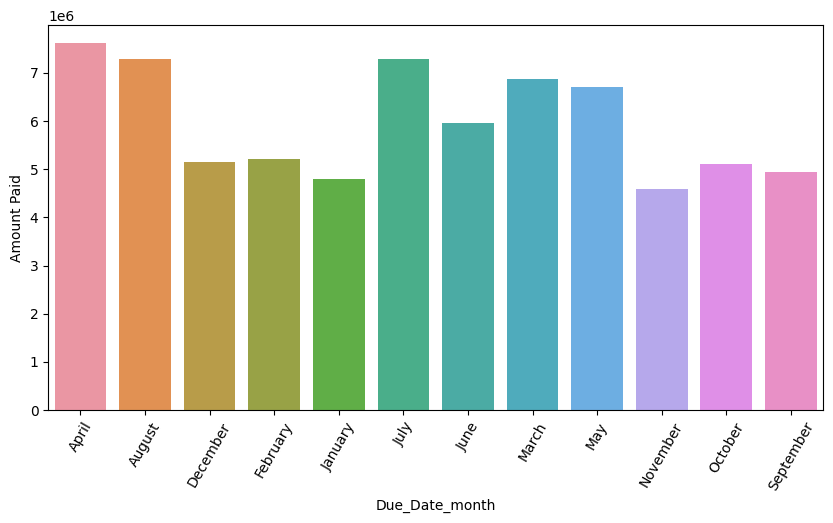

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(data=calc, x='Due_Date_month', y='Amount Paid')
plt.xticks(rotation = 60);

<Axes: xlabel='Cash_Flow_Type', ylabel='Amount Paid'>

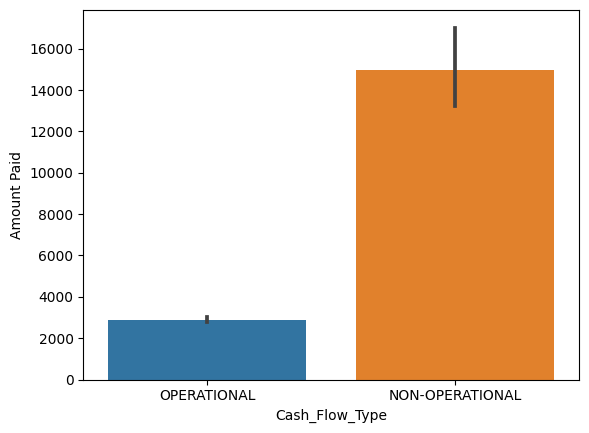

In [36]:
sns.barplot(data=df1, x='Cash_Flow_Type', y='Amount Paid')

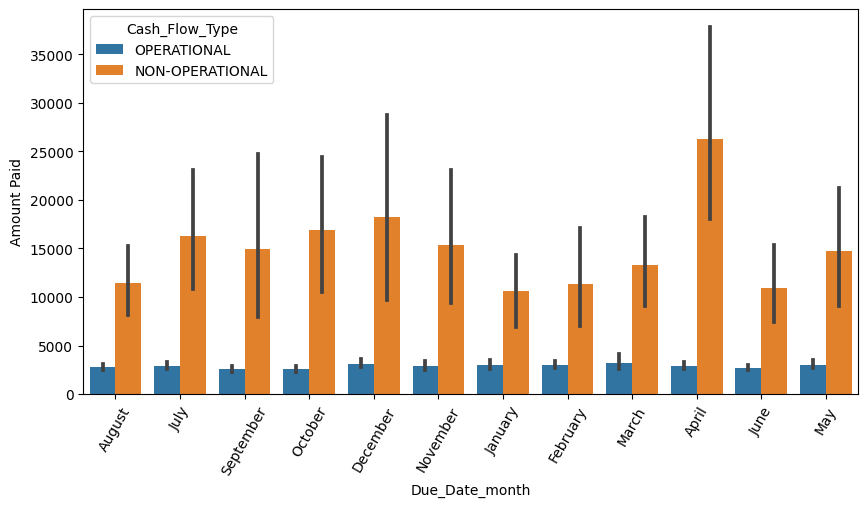

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(data=df1, x='Due_Date_month', y='Amount Paid', hue='Cash_Flow_Type')
plt.xticks(rotation = 60);

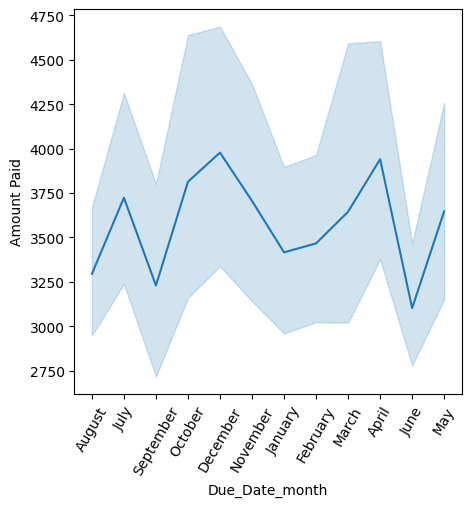

In [38]:
plt.figure(figsize=[5,5])
sns.lineplot(data=df1, x="Due_Date_month", y="Amount Paid");
plt.xticks(rotation = 60);

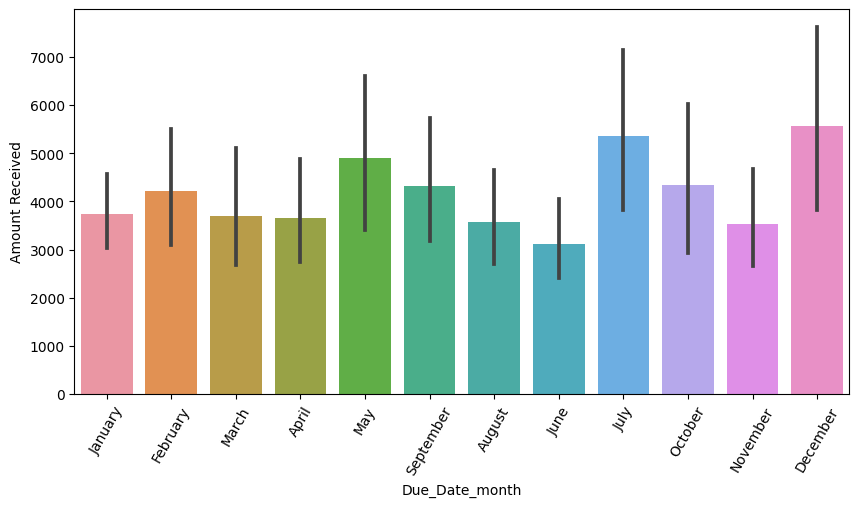

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=df2, x='Due_Date_month', y='Amount Received')
plt.xticks(rotation = 60);

<Axes: xlabel='Cash_Flow_Type', ylabel='Amount Received'>

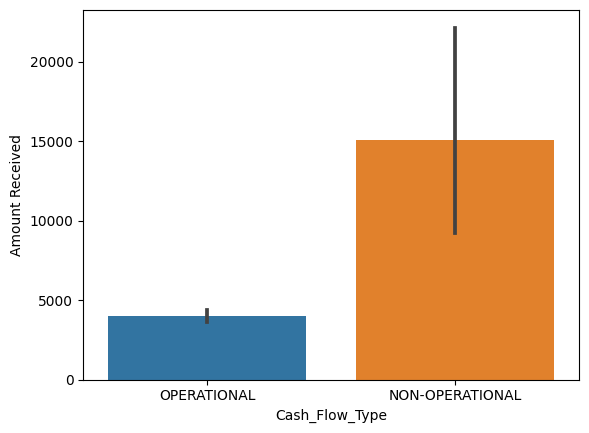

In [40]:
sns.barplot(data=df2, x='Cash_Flow_Type', y='Amount Received')

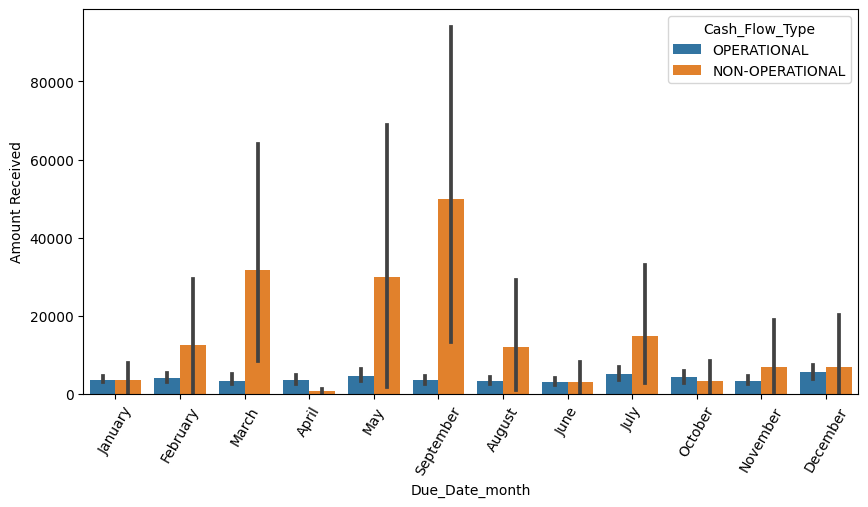

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(data=df2, x='Due_Date_month', y='Amount Received', hue='Cash_Flow_Type')
plt.xticks(rotation = 60);

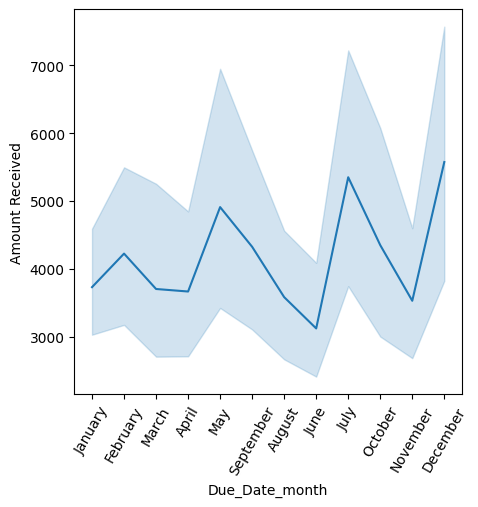

In [42]:
plt.figure(figsize=[5,5])
sns.lineplot(data=df2, x="Due_Date_month", y="Amount Received");
plt.xticks(rotation = 60);

#  Expenses by Account Type

In [48]:
df1['Type'].value_counts()

VARIABLE    11996
FIXED        7722
REVENUE       334
Name: Type, dtype: int64

In [49]:
df2['Type'].value_counts()

REVENUE    14671
Name: Type, dtype: int64

In [50]:
print("The Total amount received from Revenue type is", df2.groupby(['Type'])['Amount Received'].sum()[0])

The Total amount received from Revenue type is 60832949.49


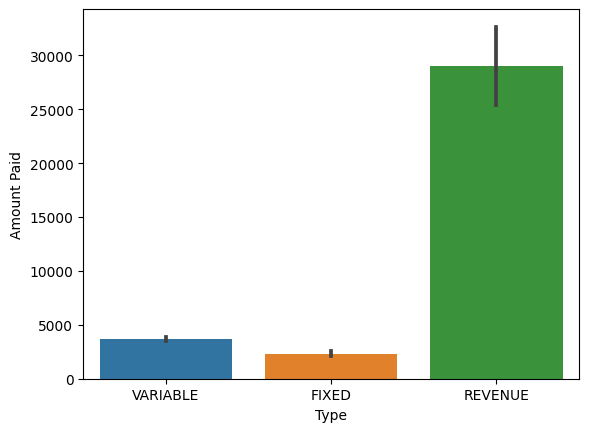

In [51]:
sns.barplot(data=df1, x="Type", y="Amount Paid");

In [52]:
df1.to_excel('sheet1.xlsx', index=False)
df2.to_excel('sheet2.xlsx', index=False)